In [ ]:
# TEAM MAYURESH AND THE THREE MUSKETEERS
# ANALYZING YELP! PRICE AND REVIEW COUNT DATA BASED ON 2 METROPOLITAN AND 2 RURAL AREAS

In [1]:
# Import required dependencies
import csv
import requests
import json
import pandas as pd
import numpy as np
from pprint import pprint
import matplotlib.pyplot as plt
import scipy.stats as stats
import matplotlib.pyplot as plt

#Import Yelp! authentication keys
from config import api_key

In [2]:
#Prepare empty lists to store all data
restaurant_name = []
restaurant_id = []
restaurant_rating = []
restaurant_reviewcount = []
restaurant_city = []
restaurant_state = []
restaurant_zipcode = []
restaurant_price = []
restaurant_type = []

#Necessary to pass header in each API request.  Do not change this.
headers = {'Authorization': f"Bearer {api_key}"}
base_url = 'https://api.yelp.com/v3/businesses/search?'
base_filters = '&categories=Restaurants&limit=50&is_closed=0'

# Construct the URL to request Yelp API data

url_location = ['San Francisco, CA', 'New York, NY', 'Des Moines, IA', 'Omaha, NE']
url_price = np.arange(1, 5, 1)
url_offset = np.arange(0, 850, 50)

In [3]:
#Yelp provides us with a list of 50 results per query

#loop through different page sets (e.g. 0-50, 51-100, 101-150...)
for off in url_offset:

    #loop through list of cities
    for location in url_location:

        #loop through list of prices $-$$$$
        for price in url_price:

            #prepare query URL for each price range and each zip code region
            query_url = f'{base_url}&location={location}&price={price}{base_filters}&offset={off}'

            #extract data into a response variable
            response = requests.get(query_url, headers=headers).json()
            
            #We were getting missing key errors for some restaurants, so decided to skip them.
            try:  
                #loop through responses and append data to empty lists
                for restaurant in response['businesses']:
                    restaurant_name.append(restaurant["name"])
                    restaurant_id.append(restaurant["id"])
                    restaurant_rating.append(restaurant["rating"])
                    restaurant_reviewcount.append(restaurant["review_count"])
                    restaurant_price.append(len(restaurant["price"]))
                    restaurant_city.append(restaurant["location"]["city"])
                    restaurant_state.append(restaurant["location"]["state"])
                    restaurant_zipcode.append(restaurant["location"]["zip_code"])
                    restaurant_type.append(restaurant["categories"][0]["title"])

                #prepare dataframe from dictionary
                restaurant_list = pd.DataFrame({'Restaurant':restaurant_name, 
                                               'ID':restaurant_id,
                                               'Rating':restaurant_rating, 
                                               'Reviews': restaurant_reviewcount, 
                                               'Price':restaurant_price, 
                                               'City': restaurant_city,
                                               'State': restaurant_state,
                                              'ZipCode':restaurant_zipcode,
                                               'Category':restaurant_type})
            except:
                continue

In [4]:
#drop duplicate records by restaurant and city
restaurant_list.dropna(how='any')
restaurant_list = restaurant_list.drop_duplicates(subset=['Restaurant', 'City'])
restaurant_list.count()

Restaurant    6612
ID            6612
Rating        6612
Reviews       6612
Price         6612
City          6612
State         6612
ZipCode       6612
Category      6612
dtype: int64

In [5]:
#investigate data by outputting results to CSV file
restaurant_list.to_csv("Restaurant_Info.csv", index=False, encoding='utf-8')

In [6]:
#read CSV and output to another dataframe
restaurant_df = pd.read_csv("Restaurant_Info.csv")
restaurant_df.head()

,Restaurant,ID,Rating,Reviews,Price,City,State,ZipCode,Category
0,Bi-Rite Creamery,wGl_DyNxSv8KUtYgiuLhmA,4.5,9351,1,San Francisco,CA,94110.0,Ice Cream & Frozen Yogurt
1,Mitchell's Ice Cream,76smcUUGRvq3k1MVPUXbnA,4.5,3710,1,San Francisco,CA,94110.0,Ice Cream & Frozen Yogurt
2,El Farolito,SGRmnarrNuVEsAjYdEoA0w,4.0,4508,1,San Francisco,CA,94110.0,Mexican
3,Saigon Sandwich,hqQoVK0vadOX7_4gN1sh3g,4.5,3071,1,San Francisco,CA,94102.0,Vietnamese
4,Golden Boy Pizza,PTFxtXS47ZVRCdZIrEWvGw,4.5,3068,1,San Francisco,CA,94133.0,Pizza


In [7]:
restaurant_df['City'].value_counts()

New York              2053
San Francisco         1948
Omaha                  868
Brooklyn               444
Des Moines             404
West Des Moines        157
Ankeny                 103
Astoria                 84
Clive                   62
Urbandale               61
Bellevue                46
La Vista                38
Altoona                 38
Papillion               33
Johnston                33
Long Island City        21
Jersey City             21
Grimes                  18
Staten Island           16
Elmhurst                13
Jackson Heights         13
Windsor Heights         13
Hoboken                 10
Woodside                 9
Ralston                  8
Carlisle                 7
Norwalk                  6
Manhattan                5
Corona                   5
Ridgewood                5
                      ... 
Weehawken                3
New York City            2
East Elmhurst            2
Middle Village           2
Williamsburg             2
Bedford-Stuyvesant       2
R

In [ ]:
#UULKAAN

In [8]:
#Prepare data for chart: # of restaurants by cuisine
categories = restaurant_df["Category"].value_counts()
categories_df = pd.DataFrame({'category':categories.index,'counts':categories.values})
popular_cuisines = categories_df.loc[categories_df["counts"]>200,["category","counts"]]

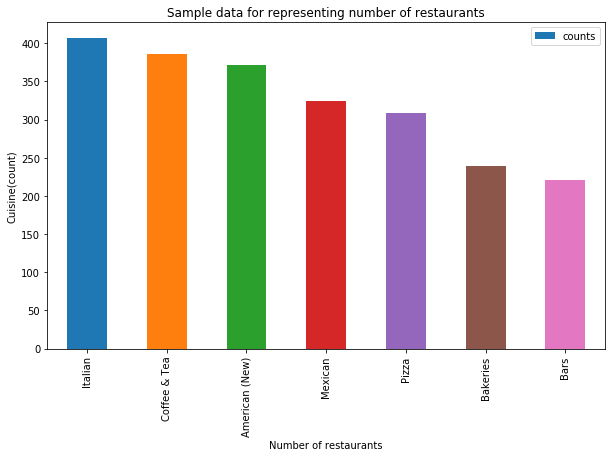

In [9]:
#Plot bar chart: # of restaurants by cuisine
popular_cuisines.plot(x="category",y="counts",kind="bar",figsize=(10,6))
plt.xlabel("Number of restaurants")
plt.ylabel("Cuisine(count)")
plt.title("Sample data for representing number of restaurants")

plt.show()

In [12]:
#Prepare dataframe for comparing # of reviews by price between urban and rural states (CA+SF vs. NE+IA)
#Rural cities
urban = restaurant_df.loc[restaurant_df["State"].isin(["CA","NY"])]
rural = restaurant_df.loc[~restaurant_df["State"].isin(["CA","NY"])]

In [38]:
#Prepare dataframe for illustrating cuisines by primary category
#Only retrieve categories where # of restaurants in each category > 160
urbancategories = urban["Category"].value_counts()
urbancategories_df = pd.DataFrame({'category':urbancategories.index, 'counts':urbancategories.values})
popular_urban_cuisines = urbancategories_df.loc[urbancategories_df["counts"]>160,["category","counts"]]
popular_urban_cuisines1=popular_urban_cuisines.head(5)

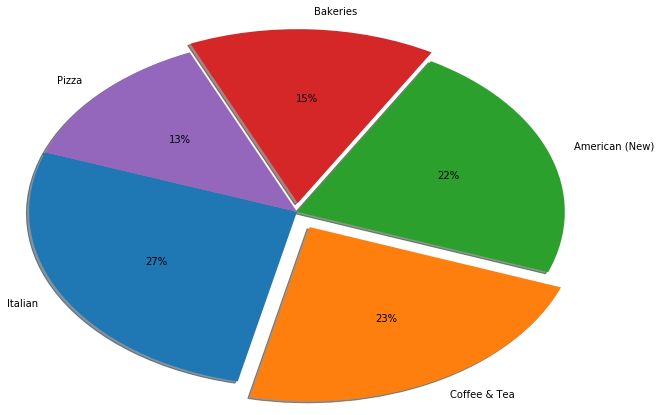

In [41]:
#Plot pie chart: Popular Urban Restaurants
plt.pie(popular_urban_cuisines1["counts"], 
        labels=popular_urban_cuisines1['category'],
        explode=(0,0.2,0,0.1,0),
        autopct='%1.f%%',
        radius=2,
        shadow=True,
        startangle=160)

plt.savefig("UrbanRestaurants.png", bbox_inches='tight')
plt.show()

In [42]:
#Prepare dataframe for illustrating cuisines by primary category
#Only retrieve categories where # of restaurants in each category > 80
ruralcategories=rural["Category"].value_counts()
ruralcategories_df=pd.DataFrame({'category':ruralcategories.index, 'counts':ruralcategories.values})

#ruralcategories_df.head(10)
popular_rural_cuisines=ruralcategories_df.loc[ruralcategories_df["counts"]>80,["category","counts"]]
popular_rural_cuisines1=popular_rural_cuisines.head(5)

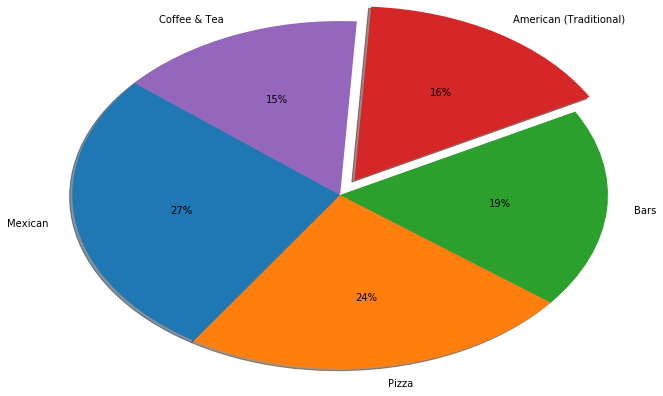

In [44]:
#Plot pie chart: Popular Rural Restaurants
plt.pie(popular_rural_cuisines1["counts"], 
        labels=popular_rural_cuisines1['category'],
        explode=(0,0,0,0.2,0),
        autopct='%1.f%%',
        radius=2,
        shadow=True, 
        startangle=140)

plt.savefig("RuralRestaurants.png", bbox_inches='tight')
plt.show()

In [45]:
#Prepare list of urban average reviews by each price point
urban_reviews_list = []

for price in url_price:
    urbanprice = urban.groupby('Price').get_group(price)
    urban_mean_reviews = round(urbanprice["Reviews"].mean(), 2)
    urban_reviews_list.append(urban_mean_reviews)

#print(urban_reviews_list)

In [20]:
#Prepare list of rural average reviews by each price point
rural_reviews_list=[]

for price in url_price:
    ruralprice = rural.groupby('Price').get_group(price)
    rural_mean_reviews = round(ruralprice["Reviews"].mean(), 2)
    rural_reviews_list.append(rural_mean_reviews)


#print(rural_reviews_list)

In [21]:
#Prepare a dataframe of the average urban and rural reviews by price
mean_reviews = pd.DataFrame({"Price":url_price,
                             "MeanUrbanReviews":urban_reviews_list,
                             "MeanRuralReviews":rural_reviews_list})
mean_reviews

,Price,MeanUrbanReviews,MeanRuralReviews
0,1,450.76,36.18
1,2,918.75,67.92
2,3,524.71,196.73
3,4,345.25,69.38


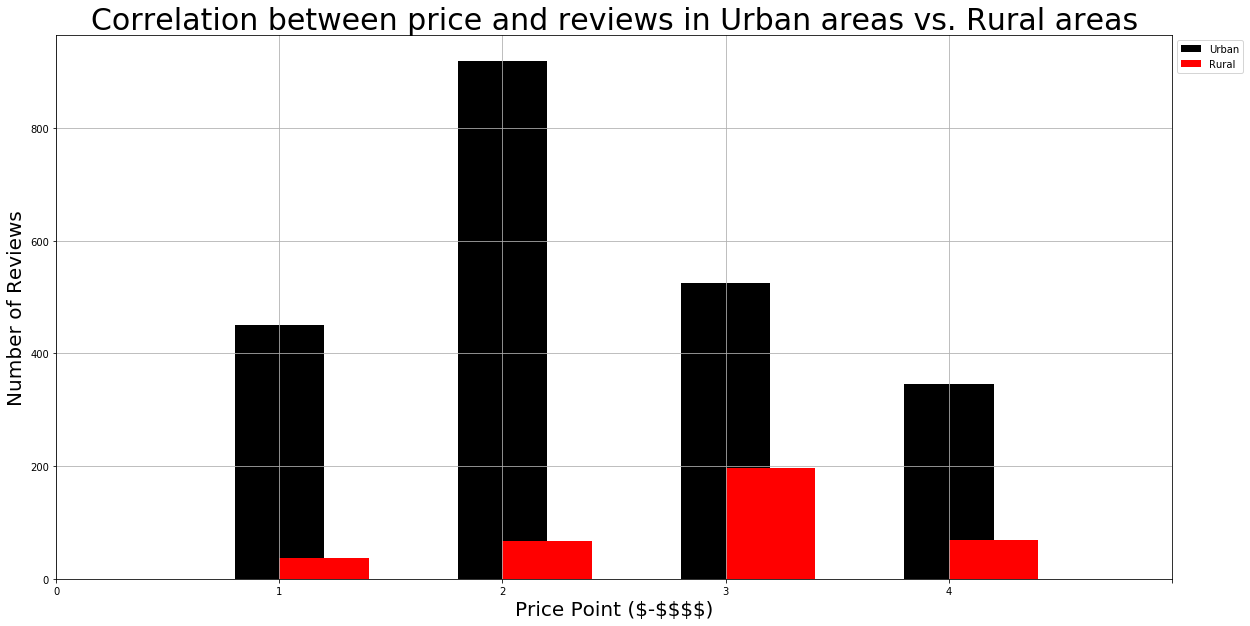

In [29]:
#Plot bar chart: average urban and rural reviews by price
plt.figure(figsize=(20,10))

#Urban
plt.bar(mean_reviews["Price"],
        mean_reviews["MeanUrbanReviews"],
        width=0.4,color='black',
        align='center',
        label="Urban")

#Rural
plt.bar((mean_reviews["Price"]+0.2),
        mean_reviews["MeanRuralReviews"],
        width=0.4,color='r',
        align='center',
        label="Rural")

plt.xlabel("Price Point ($-$$$$)",fontsize=20)
plt.ylabel("Number of Reviews",fontsize=20)
plt.legend(loc="upper left", bbox_to_anchor=(1,1))
plt.title("Correlation between price and reviews in Urban areas vs. Rural areas",fontsize=30)
plt.xticks(np.arange(6),(0,1,2,3,4))
plt.grid()

plt.savefig("AverageReviews_Urban_Rural.png", bbox_inches='tight')
plt.show()       

In [23]:
#CHART: AVERAGE RATINGS BY PRICE FOR URBAN AND RURAL

In [24]:
#Prepare list of urban ratings by each price point
urban_ratings_list = []

for price in url_price:
    urbanprice = urban.groupby('Price').get_group(price)
    urban_mean_ratings = round(urbanprice["Rating"].mean(), 2)
    urban_ratings_list.append(urban_mean_ratings)

#print(urban_ratings_list)

In [25]:
#Prepare list of rural ratings by each price point
rural_ratings_list = []

for price in url_price:
    ruralprice = rural.groupby('Price').get_group(price)
    rural_mean_ratings = round(ruralprice["Rating"].mean(), 2)
    rural_ratings_list.append(rural_mean_ratings)

#print(urban_ratings_list)

In [26]:
#Prepare a dataframe of the average urban and rural ratings by price
mean_ratings = pd.DataFrame({"Price":url_price,
                             "MeanUrbanRatings":urban_ratings_list,
                             "MeanRuralRatings":rural_ratings_list})
mean_ratings

,Price,MeanUrbanRatings,MeanRuralRatings
0,1,4.08,3.68
1,2,4.04,3.65
2,3,3.88,3.87
3,4,3.82,3.26


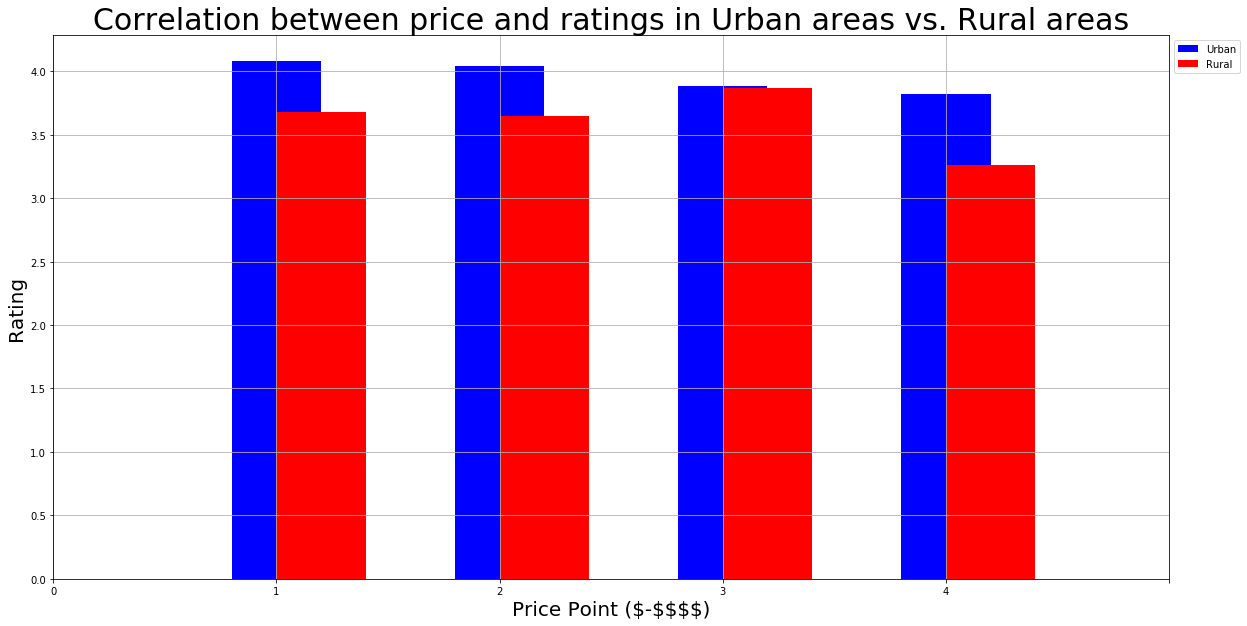

In [31]:
#Plot bar chart: average urban and rural reviews by price
plt.figure(figsize=(20,10))

#Urban
plt.bar(mean_ratings["Price"],
        mean_ratings["MeanUrbanRatings"],
        width=0.4,color='blue',
        align='center',
        label="Urban")

#Rural
plt.bar((mean_ratings["Price"]+0.2),
        mean_ratings["MeanRuralRatings"],
        width=0.4,color='r',
        align='center',
        label="Rural")

plt.xlabel("Price Point ($-$$$$)",fontsize=20)
plt.ylabel("Rating",fontsize=20)
plt.legend(loc="upper left", bbox_to_anchor=(1,1))
plt.title("Correlation between price and ratings in Urban areas vs. Rural areas",fontsize=30)
plt.xticks(np.arange(6),(0,1,2,3,4))
plt.grid()

plt.savefig("AverageRatings_Urban_Rural.png", bbox_inches='tight')
plt.show()       

In [ ]:
#YANG

In [ ]:
#Prepare boxplot of the reviews by different price indicator
boxprops = dict(linestyle='-', 
                linewidth=6, 
                color='red')
medianprops = dict(linestyle='-', 
                   linewidth=6, 
                   color='black')

reivew_anova_all = restaurant_df.boxplot("Reviews", 
                                         by="Price", 
                                         figsize=(15, 10),
                                         showmeans=True,
                                         boxprops=boxprops,
                                         medianprops=medianprops)

# get rid of the automatic title
plt.suptitle("")
reivew_anova_all.set_xlabel("")
reivew_anova_all.set_title("Boxplot comparing Number of Reviews Across Different Price Indicators",
                           fontsize=20)

plt.savefig("Review_ANOVA.png")

In [ ]:
#Prepare boxplot of the reviews by different price indicator without showing the outliers
review_anova_within = restaurant_df.boxplot("Reviews", 
                                            by="Price", 
                                            figsize=(20, 10),
                                            showfliers=False, 
                                            showmeans=True,
                                            boxprops=boxprops,
                                            medianprops=medianprops)

plt.suptitle("")
review_anova_within.set_xlabel("")
review_anova_within.set_title("Boxplot Comparing Number of Reviews Across Different Price Indicators Without Showing Outliers"
                             ,fontsize=20)

plt.savefig("Review_ANOVA_WithoutOutliers.png")

In [ ]:
#Prepare boxplot of the ratings by different price indicator
rating_anova_all=restaurant_df.boxplot("Rating", 
                                       by="Price", 
                                       figsize=(15, 10),
                                       showmeans=True,
                                       boxprops=boxprops,
                                       medianprops=medianprops)

plt.suptitle("")
rating_anova_all.set_xlabel("")
rating_anova_all.set_title("Boxplot Comparing Ratings Across Different Price Indicators",
                           fontsize=20)

plt.savefig("Rating_ANOVA.png")

In [ ]:
#Prepare boxplot of the ratings by different price indicator without showing outliers
rating_anova_within=restaurant_df.boxplot("Rating", 
                                          by="Price", 
                                          figsize=(15, 10),
                                          showmeans=True,
                                          showfliers=False, 
                                          boxprops=boxprops,
                                          medianprops=medianprops)

plt.suptitle("")
rating_anova_within.set_xlabel("")
rating_anova_within.set_title("Boxplot Comparing Ratings Across Different Price Indicators Without Showing Outliers",
                              fontsize=20)

plt.savefig("Rating_ANOVA_WithoutOutliers.png")

In [ ]:
# Extracting reviews
review1 = restaurant_df[restaurant_df["Price"]==1]["Reviews"]
review2 = restaurant_df[restaurant_df["Price"]==2]["Reviews"]
review3 = restaurant_df[restaurant_df["Price"]==3]["Reviews"]
review4 = restaurant_df[restaurant_df["Price"]==4]["Reviews"]

# Extracting ratings
rating1 = restaurant_df[restaurant_df["Price"]==1]["Rating"]
rating2 = restaurant_df[restaurant_df["Price"]==2]["Rating"]
rating3 = restaurant_df[restaurant_df["Price"]==3]["Rating"]
rating4 = restaurant_df[restaurant_df["Price"]==4]["Rating"]

reviewanova = stats.f_oneway(review1, review2, review3, review4)

ratinganova = stats.f_oneway(rating1,rating2, rating3, rating4)

In [ ]:
print(reviewanova)

In [ ]:
print(ratinganova)